# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | kataragama
City not found. Skipping...
Processing Record 4 of Set 1 | susuman
Processing Record 5 of Set 1 | murun-kuren
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | newman
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | antonio enes
Processing Record 11 of Set 1 | kone
Processing Record 12 of Set 1 | brookings
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | sur
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | uray
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | mantua
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of 

Processing Record 38 of Set 4 | padam
City not found. Skipping...
Processing Record 39 of Set 4 | veinticinco de mayo
Processing Record 40 of Set 4 | northam
Processing Record 41 of Set 4 | ponta delgada
Processing Record 42 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 43 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 44 of Set 4 | sinabang
Processing Record 45 of Set 4 | westport
Processing Record 46 of Set 4 | zhigalovo
Processing Record 47 of Set 4 | manfalut
Processing Record 48 of Set 4 | nizhnesortymskiy
Processing Record 49 of Set 4 | alice springs
Processing Record 0 of Set 5 | recani
Processing Record 1 of Set 5 | lensk
Processing Record 2 of Set 5 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 3 of Set 5 | conde
Processing Record 4 of Set 5 | kirakira
Processing Record 5 of Set 5 | armyansk
Processing Record 6 of Set 5 | yuzhno-kurilsk
Processing Record 7 of Set 5 | namdrik
Processing Record 8 of Set 5 | cabo sa

Processing Record 28 of Set 8 | gadzhiyevo
Processing Record 29 of Set 8 | ambalangoda
Processing Record 30 of Set 8 | spring creek
Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | antalaha
Processing Record 33 of Set 8 | sola
Processing Record 34 of Set 8 | vinita
Processing Record 35 of Set 8 | bandarban
Processing Record 36 of Set 8 | salalah
Processing Record 37 of Set 8 | mahibadhoo
Processing Record 38 of Set 8 | kupang
Processing Record 39 of Set 8 | as sulayyil
Processing Record 40 of Set 8 | nar'yan-mar
Processing Record 41 of Set 8 | emerald
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | ejido benito juarez
City not found. Skipping...
Processing Record 44 of Set 8 | amga
Processing Record 45 of Set 8 | new norfolk
Processing Record 46 of Set 8 | itoman
Processing Record 47 of Set 8 | reggane
Processing Record 48 of Set 8 | aginskoye
Processing Record 49 of Set 8 | salinopolis
Processing Record 0 of Set 9 | salahonda
Pro

Processing Record 14 of Set 12 | robbah
Processing Record 15 of Set 12 | chemolgan
Processing Record 16 of Set 12 | tobi village
City not found. Skipping...
Processing Record 17 of Set 12 | itamaraca
Processing Record 18 of Set 12 | hilo
Processing Record 19 of Set 12 | san antonio de pale
Processing Record 20 of Set 12 | happy valley-goose bay
Processing Record 21 of Set 12 | fort st. john
Processing Record 22 of Set 12 | lockwood
Processing Record 23 of Set 12 | eastham
Processing Record 24 of Set 12 | hami
Processing Record 25 of Set 12 | balabac
Processing Record 26 of Set 12 | daru
Processing Record 27 of Set 12 | nova mayachka
Processing Record 28 of Set 12 | llanes
Processing Record 29 of Set 12 | shenjiamen
Processing Record 30 of Set 12 | sao gabriel
Processing Record 31 of Set 12 | veraval
Processing Record 32 of Set 12 | albacete
Processing Record 33 of Set 12 | kununurra
Processing Record 34 of Set 12 | mugia
Processing Record 35 of Set 12 | kindu
Processing Record 36 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,280.88,100,100,4.63,US,1698792611
1,waitangi,-43.9535,-176.5597,287.49,95,100,5.36,NZ,1698792611
2,susuman,62.7833,148.1667,255.92,99,96,1.34,RU,1698792612
3,murun-kuren,49.6342,100.1625,275.53,81,97,3.10,MN,1698792613
4,tura,25.5198,90.2201,292.80,71,0,1.37,IN,1698792613


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,280.88,100,100,4.63,US,1698792611
1,waitangi,-43.9535,-176.5597,287.49,95,100,5.36,NZ,1698792611
2,susuman,62.7833,148.1667,255.92,99,96,1.34,RU,1698792612
3,murun-kuren,49.6342,100.1625,275.53,81,97,3.10,MN,1698792613
4,tura,25.5198,90.2201,292.80,71,0,1.37,IN,1698792613


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

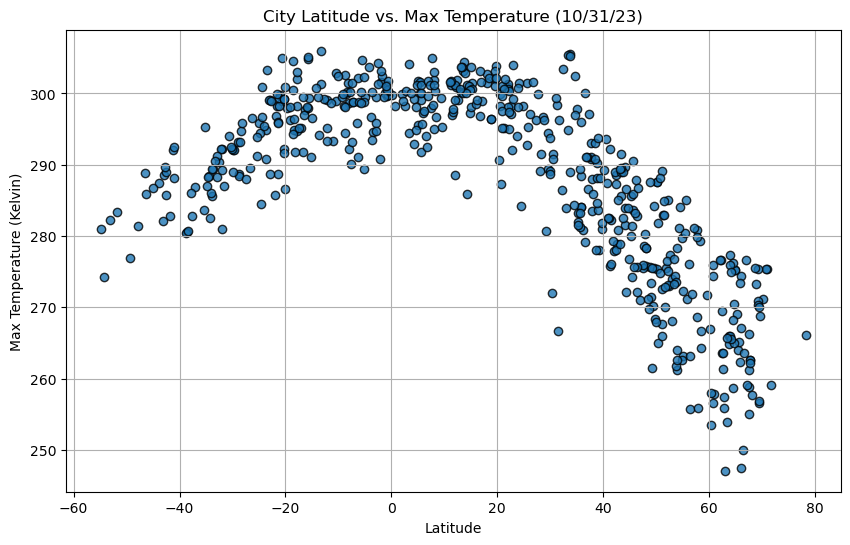

In [30]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (Kelvin)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

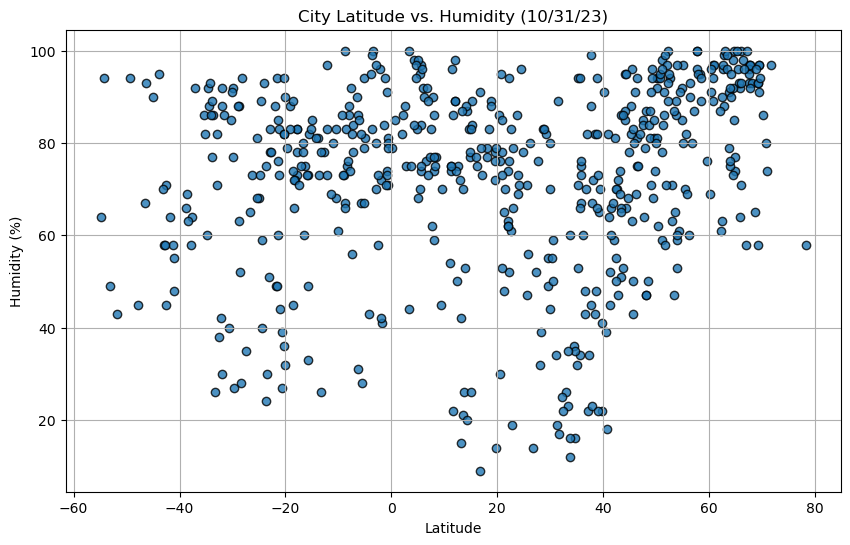

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

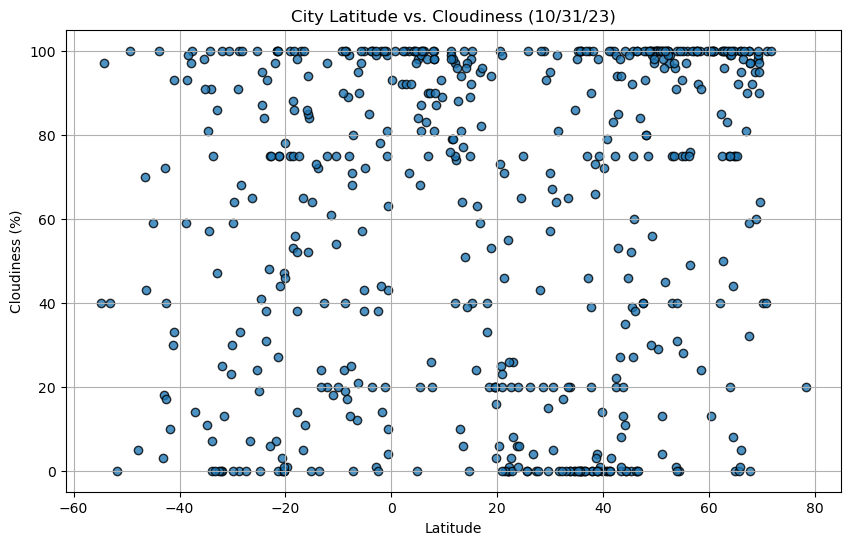

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

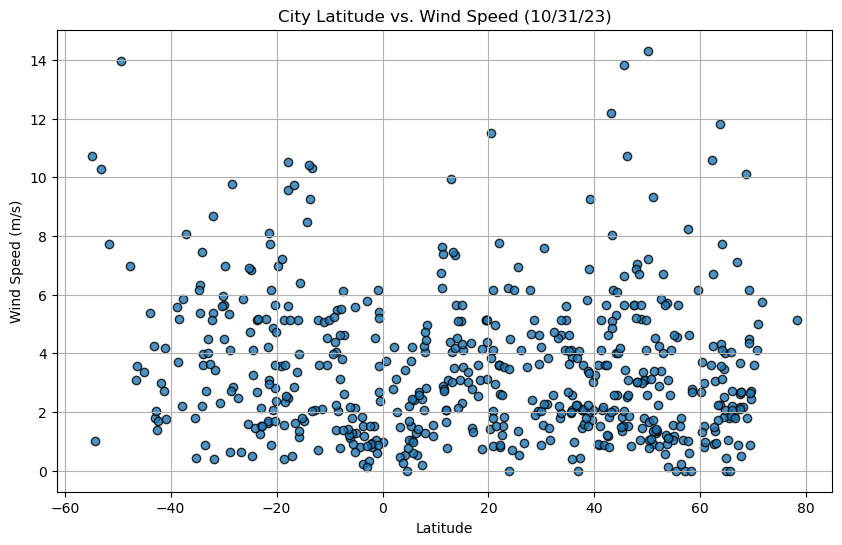

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    
    # Compute the linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = slope * x_values + intercept
    
    # Create the line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="yellow", linewidths=1, marker="o", alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Print the correlation coefficient
    print(f"The r-value is: {r_value**2}")

    # Display the plot
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,280.88,100,100,4.63,US,1698792611
2,susuman,62.7833,148.1667,255.92,99,96,1.34,RU,1698792612
3,murun-kuren,49.6342,100.1625,275.53,81,97,3.10,MN,1698792613
4,tura,25.5198,90.2201,292.80,71,0,1.37,IN,1698792613
5,newman,37.3138,-121.0208,297.12,34,100,0.45,US,1698792614


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,287.49,95,100,5.36,NZ,1698792611
6,edinburgh of the seven seas,-37.0676,-12.3116,286.84,92,14,8.08,SH,1698792614
7,west island,-12.1568,96.8225,299.14,83,75,5.14,CC,1698792615
8,antonio enes,-16.2325,39.9086,297.75,75,11,3.36,MZ,1698792615
9,kone,-21.0595,164.8658,299.75,44,44,0.86,NC,1698792616


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7442630394953709


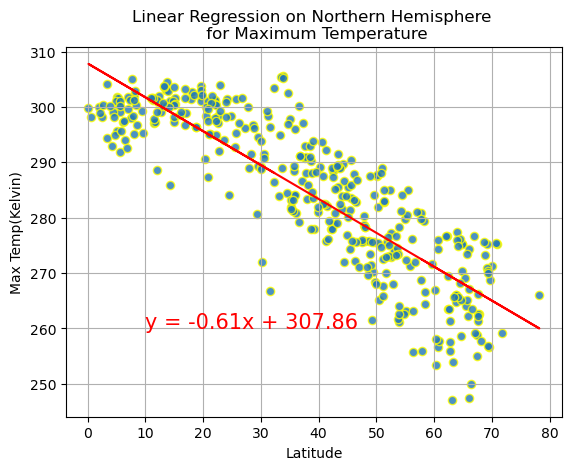

In [40]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Linear Regression on Northern Hemisphere \n for Maximum Temperature", "Latitude", "Max Temp(Kelvin)", (10,260))


The r-value is: 0.5797604437129215


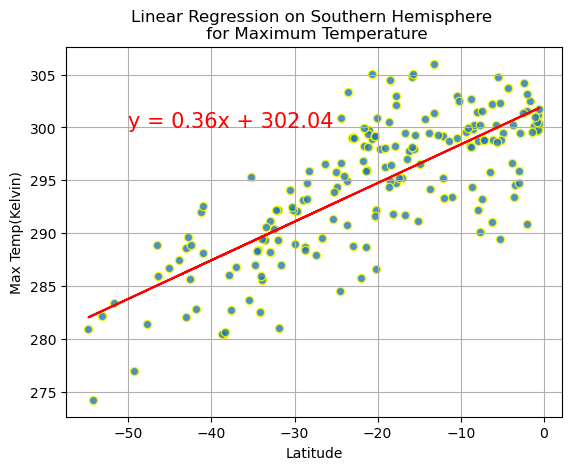

In [41]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Linear Regression on Southern Hemisphere \n for Maximum Temperature", "Latitude", "Max Temp(Kelvin)", (-50, 300))


**Discussion about the linear relationship: Northern Hemisphere: Basically, the further north you go from the equator, the cooler it gets. Think of it like moving away from a bonfire; it's warmer when you're close and cooler as you step back.

Southern Hemisphere: The same idea applies here, but going south. The closer you are to the equator, the warmer it feels, kinda like being near the heart of the party.



### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05947297533051478


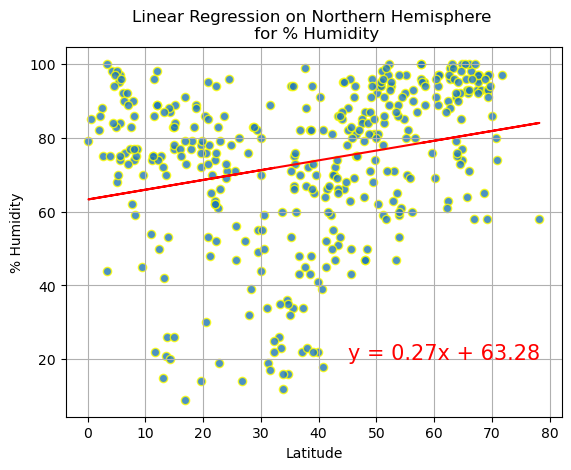

In [37]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Linear Regression on Northern Hemisphere \n for % Humidity", "Latitude", "% Humidity", (45, 20))

The r-value is: 0.022903206489719025


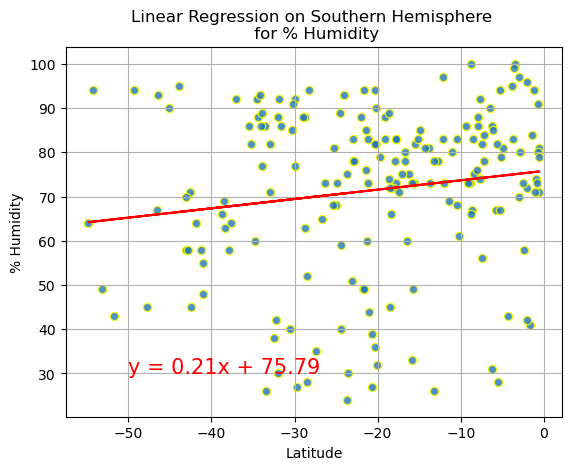

In [42]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Linear Regression on Southern Hemisphere \n for % Humidity", "Latitude", "% Humidity", (-50, 30))

**Discussion about the linear relationship:** Both Hemispheres: With humidity, it's a mixed bag. You might think that moving closer to the poles would always make things more humid because of melting ice, but it's not that simple. Lots of things, like being near the ocean or high up in the mountains, can change how humid it feels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008534402533566696


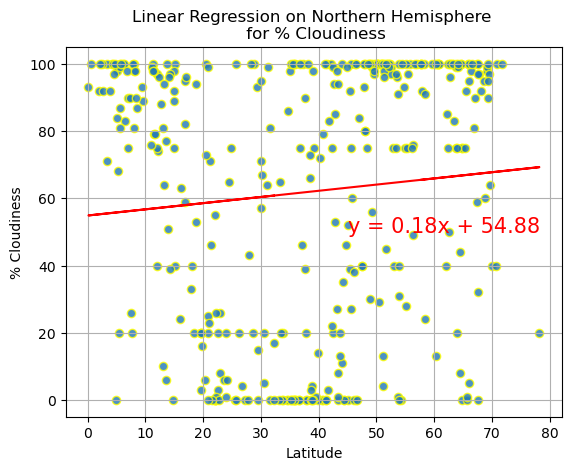

In [43]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Linear Regression on Northern Hemisphere \n for % Cloudiness", "Latitude", "% Cloudiness", (45, 50))

The r-value is: 0.009844555505552216


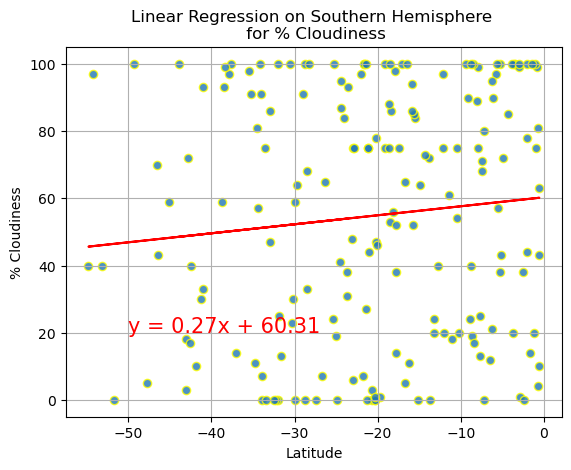

In [45]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Linear Regression on Southern Hemisphere \n for % Cloudiness", "Latitude", "% Cloudiness", (-50, 20))

**Discussion about the linear relationship:** Both Hemispheres: Clouds do their own thing, really. Whether you're in the Northern or Southern Hemisphere, cloudiness doesn't seem to care much about how close or far you are from the equator. Clouds have their own vibe and aren't too bothered by our latitude rules.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.000549019089998193


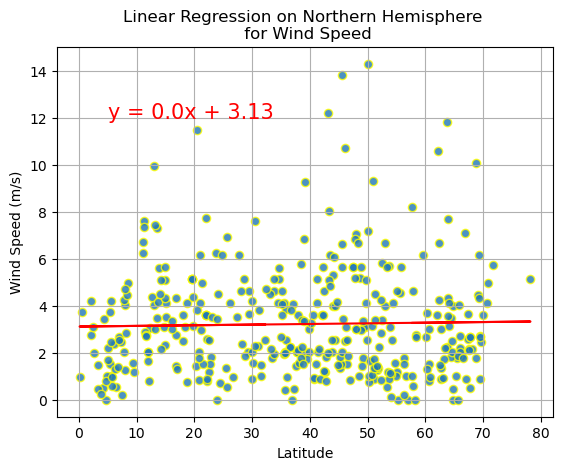

In [46]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Linear Regression on Northern Hemisphere \n for Wind Speed", "Latitude", "Wind Speed (m/s)", (5, 12))

The r-value is: 0.07867476210036538


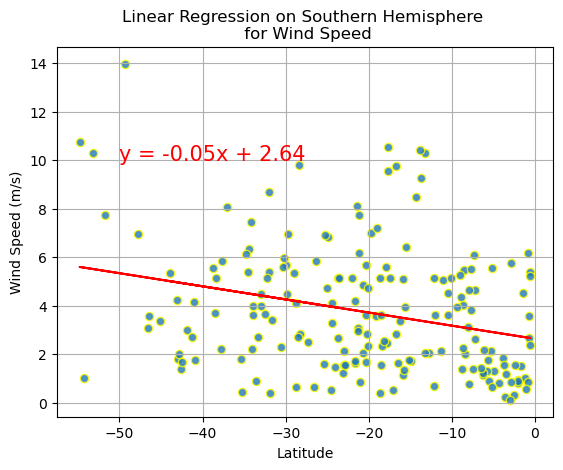

In [47]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Linear Regression on Southern Hemisphere \n for Wind Speed", "Latitude", "Wind Speed (m/s)", (-50, 10))

**Discussion about the linear relationship:** Northern Hemisphere: Up north, wind can pick up speed, especially as you get closer to the North Pole. But just like with our other weather friends, local stuff like mountains can change the game.

Southern Hemisphere: Down south, there are these wild wind zones, with cool names like the "Roaring Forties." So yeah, it can get pretty windy the further south you go.